In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [55]:
df=pd.read_csv('/content/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53566,46047,-2.885416,-2.647887,1.903441,3.726885,3.800798,-1.644480,-1.924198,0.707696,-1.070468,...,0.284893,-0.268122,0.977417,0.136853,-1.144367,-0.535616,0.098494,0.305740,19.02,0.0
53567,46048,1.061410,0.045830,0.970401,1.102883,-0.490685,0.219968,-0.424285,0.235960,0.016498,...,0.033158,0.067127,0.053801,-0.010221,0.209877,-0.484136,0.057583,0.028018,28.70,0.0
53568,46048,-0.202740,0.295074,1.924698,1.009344,-0.235931,-0.272232,0.261015,-0.162146,-0.583849,...,0.321731,1.056540,0.093902,0.608566,-0.931546,0.466156,0.016695,-0.024568,54.81,0.0
53569,46048,-0.730116,0.796820,2.122484,-1.318082,0.019762,-0.857857,0.975752,-0.399896,0.359189,...,-0.149736,0.093479,-0.056586,0.650087,-0.473889,0.662115,0.060486,-0.208536,4.53,0.0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53571 entries, 0 to 53570
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    53571 non-null  int64  
 1   V1      53571 non-null  float64
 2   V2      53571 non-null  float64
 3   V3      53571 non-null  float64
 4   V4      53571 non-null  float64
 5   V5      53571 non-null  float64
 6   V6      53571 non-null  float64
 7   V7      53571 non-null  float64
 8   V8      53571 non-null  float64
 9   V9      53571 non-null  float64
 10  V10     53571 non-null  float64
 11  V11     53571 non-null  float64
 12  V12     53571 non-null  float64
 13  V13     53571 non-null  float64
 14  V14     53571 non-null  float64
 15  V15     53571 non-null  float64
 16  V16     53571 non-null  float64
 17  V17     53571 non-null  float64
 18  V18     53571 non-null  float64
 19  V19     53571 non-null  float64
 20  V20     53571 non-null  float64
 21  V21     53571 non-null  float64
 22

In [57]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,53571.000000,53571.000000,53571.000000,53571.000000,53571.000000,53571.000000,53571.000000,53571.000000,53571.000000,53571.000000,...,53571.000000,53571.000000,53570.000000,53570.000000,53570.000000,53570.000000,53570.000000,53570.000000,53570.000000,53570.000000
mean,30004.864404,-0.243182,0.000586,0.691588,0.179664,-0.257872,0.102917,-0.119311,0.052872,0.094530,...,-0.028932,-0.106714,-0.039090,0.007830,0.135096,0.020158,0.003957,0.003972,94.260870,0.002856
std,13302.545313,1.879598,1.639428,1.483708,1.393856,1.411097,1.313136,1.271570,1.214929,1.201748,...,0.731807,0.636939,0.593273,0.596080,0.438590,0.500092,0.388427,0.329538,252.290845,0.053366
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.577118,-8.567638,-9.617915,0.000000,0.000000
25%,23663.500000,-0.994263,-0.573628,0.212411,-0.724005,-0.873897,-0.636806,-0.606014,-0.147112,-0.630279,...,-0.230582,-0.528974,-0.179410,-0.322721,-0.128328,-0.330573,-0.063648,-0.006589,7.680000,0.000000
50%,34251.000000,-0.249472,0.078153,0.790661,0.189575,-0.290113,-0.152437,-0.075304,0.058859,-0.012999,...,-0.066124,-0.082370,-0.051736,0.062416,0.174351,-0.073699,0.008850,0.022405,25.495000,0.000000
75%,40127.000000,1.154647,0.732455,1.424778,1.061933,0.281788,0.493733,0.425496,0.333521,0.780864,...,0.110098,0.307953,0.079102,0.401967,0.421204,0.298577,0.083071,0.076498,86.867500,0.000000
max,46050.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,12910.930000,1.000000


In [58]:
df['Class'].unique()

array([ 0.,  1., nan])

In [59]:
df['Class'].value_counts()


0.0    53417
1.0      153
Name: Class, dtype: int64

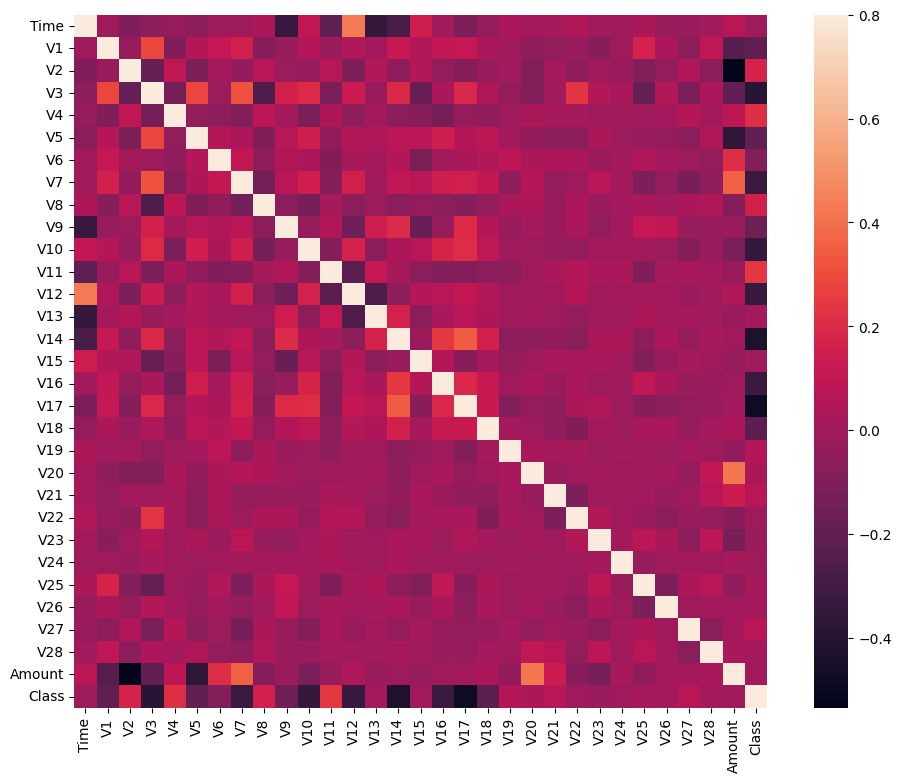

In [60]:
corr = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corr, vmax = .8, square = True)
plt.show()

In [61]:
df['Amount'] = StandardScaler().fit_transform(np.array(df['Amount']).reshape(-1, 1))
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.219428,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.362961,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.127277,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.115896,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.096203,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53566,46047,-2.885416,-2.647887,1.903441,3.726885,3.800798,-1.644480,-1.924198,0.707696,-1.070468,...,0.284893,-0.268122,0.977417,0.136853,-1.144367,-0.535616,0.098494,0.305740,-0.298233,0.0
53567,46048,1.061410,0.045830,0.970401,1.102883,-0.490685,0.219968,-0.424285,0.235960,0.016498,...,0.033158,0.067127,0.053801,-0.010221,0.209877,-0.484136,0.057583,0.028018,-0.259865,0.0
53568,46048,-0.202740,0.295074,1.924698,1.009344,-0.235931,-0.272232,0.261015,-0.162146,-0.583849,...,0.321731,1.056540,0.093902,0.608566,-0.931546,0.466156,0.016695,-0.024568,-0.156372,0.0
53569,46048,-0.730116,0.796820,2.122484,-1.318082,0.019762,-0.857857,0.975752,-0.399896,0.359189,...,-0.149736,0.093479,-0.056586,0.650087,-0.473889,0.662115,0.060486,-0.208536,-0.355668,0.0


In [85]:
X=df.drop(['Class'], axis=1)
y=df["Class"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ",X_test.shape)

Shape of X_train:  (37499, 30)
Shape of X_test:  (16072, 30)


SMOTE

In [86]:
import pandas as pd

# Assuming X_train and y_train are DataFrames
# You may need to adapt this code if X_train and y_train are in a different format

# Remove rows with NaN values from both X_train and y_train
X_train = X_train.dropna()
y_train = y_train.dropna()

# If X_train and y_train have the same number of rows after removing NaNs, you can reset the index
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)


In [96]:
sm = SMOTE()  #solving class imbalance problem
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


In [97]:
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

predictions_rf=random_forest.predict(X_test)
random_forest_score=random_forest.score(X_test, y_test)*100

In [99]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

predictions_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, y_test)*100

In [100]:
def metrics(actuals, predictions):
  print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
  print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
  print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
  print("F1 score: {:.5f}".format(f1_score(actuals, predictions)))

In [101]:
print("Evaluation of Random Forest Model")
print()
metrics(y_test, predictions_rf.round())

Evaluation of Random Forest Model

Accuracy: 0.99956
Precision: 0.97368
Recall: 0.86047
F1 score: 0.91358


In [102]:
print("Evaluation of Decision Tree Model")
print()
metrics(y_test, predictions_rf.round())

Evaluation of Decision Tree Model

Accuracy: 0.99956
Precision: 0.97368
Recall: 0.86047
F1 score: 0.91358


In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16029
         1.0       0.00      0.00      0.00        43

    accuracy                           0.99     16072
   macro avg       0.50      0.50      0.50     16072
weighted avg       0.99      0.99      0.99     16072



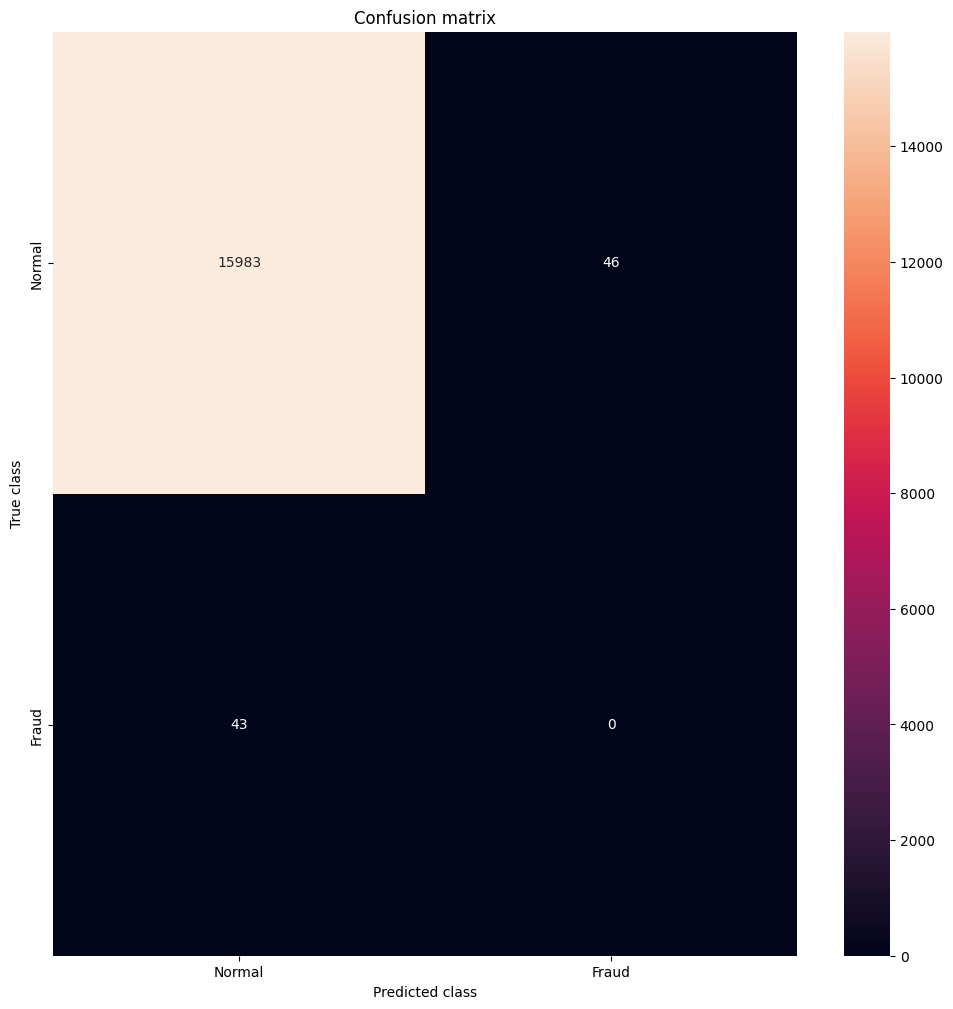

In [104]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()